# Lesson 1

## Purpose

In this lesson we will learn how to create a simple model, run it and graph it.

## Load CADETSettings

This imports all the standard libraries, finds CADET and find and creates all the lesson folders.

In [1]:
%run CADETSettings.ipynb

CADET was found. Continue to the next step.


# CADET documentation
CADET documentation is available in PDF form in the Windows build in the zip file and can be downloaded from https://cadet-web.de/static/simulation/cadet_3_1_2.pdf . During this workshop you might want to open the pdf in a new tab or in something like Acrobat. I have embedded this in the notebook but for general usage it is easier to have it open separately.

## Creating a simple model

This is the same example that was used in the installation instructions and will now be looked at in more detail.

It is helpful to split the screen here and put the documentation on one side and the model on the other.

CompletedProcess(args=['C:/Users/kosh_000/CADET/cadet/bin/cadet-cli.exe', 'C:/Users/kosh_000/CADET/lessons/lesson_1/example_0/example.h5'], returncode=0, stdout=b'', stderr=b'')
Simulation completed successfully


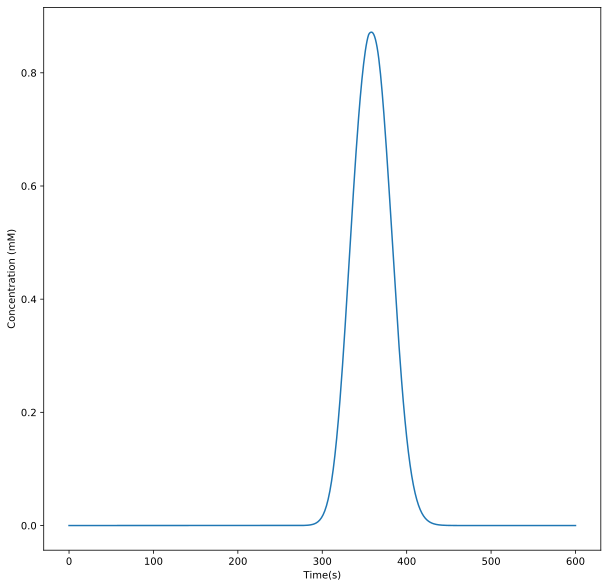

In [2]:
#simple model
example_dir_0 = lesson_1 / "example_0"
example_dir_0.mkdir(exist_ok = True)

example0 = Cadet()

#give a filename for where the simulation should be saved
example0.filename = (example_dir_0 / 'example.h5').as_posix()

#set the number of unit operations
example0.root.input.model.nunits = 3

#nswitches is the number of different ways the units are connected in this simulation
#This is important for cyclic system and more complex setups
example0.root.input.model.connections.nswitches = 1

example0.root.input.model.connections.switch_000.section = 0

#this connects unit 0 to unit 1 and unit 1 to unit 2 with 2.88e-8 m^3/s with all components
example0.root.input.model.connections.switch_000.connections = [0, 1, -1, -1, 2.88e-8,
                                                              1, 2, -1, -1, 2.88e-8]

#create an inlet
example0.root.input.model.unit_000.unit_type = 'INLET'
example0.root.input.model.unit_000.ncomp = 1
example0.root.input.model.unit_000.inlet_type = 'PIECEWISE_CUBIC_POLY'

#const_coeff + lin_coeff*t + quad_coeff*t^2 + cube_coeff*t^3
example0.root.input.model.unit_000.sec_000.const_coeff = [1.0,]
example0.root.input.model.unit_000.sec_000.lin_coeff = [0.0,]
example0.root.input.model.unit_000.sec_000.quad_coeff = [0.0,]
example0.root.input.model.unit_000.sec_000.cube_coeff = [0.0,]

example0.root.input.model.unit_000.sec_001.const_coeff = [0.0,]
example0.root.input.model.unit_000.sec_001.lin_coeff = [0.0,]
example0.root.input.model.unit_000.sec_001.quad_coeff = [0.0,]
example0.root.input.model.unit_000.sec_001.cube_coeff = [0.0,]

#create an outlet
example0.root.input.model.unit_002.ncomp = 1
example0.root.input.model.unit_002.unit_type = 'OUTLET'

#create a column
example0.root.input.model.unit_001.unit_type = 'LUMPED_RATE_MODEL_WITH_PORES'
example0.root.input.model.unit_001.ncomp = 1
example0.root.input.model.unit_001.adsorption_model = 'NONE'
example0.root.input.model.unit_001.init_c = [0.0,]
example0.root.input.model.unit_001.init_q = [0.0,]
example0.root.input.model.unit_001.col_dispersion = 2.0e-7
example0.root.input.model.unit_001.col_length = 0.25
example0.root.input.model.unit_001.col_porosity = 0.37
example0.root.input.model.unit_001.film_diffusion = [0.0,]
example0.root.input.model.unit_001.par_porosity = 0.33
example0.root.input.model.unit_001.par_radius = 4.5e-5
example0.root.input.model.unit_001.velocity = 1
example0.root.input.model.unit_001.cross_section_area = 1.0386890710931253E-4

#discretization column settings
example0.root.input.model.unit_001.discretization.ncol = 100
example0.root.input.model.unit_001.discretization.nbound = [0,]


#DEFAULT VALUES for discretization
example0.root.input.model.unit_001.discretization.use_analytic_jacobian = 1

#set what values get saved
example0.root.input['return'].unit_000.write_solution_inlet = 1
example0.root.input['return'].unit_002.write_solution_outlet = 1

#automatically run the simulation in parallel
example0.root.input.solver.nthreads = 0

#set the times that the simulator writes out data for
example0.root.input.solver.user_solution_times = numpy.linspace(0, 600, 601)

#set all the tolerances for the time integrator
example0.root.input.solver.time_integrator.abstol = 1e-6
example0.root.input.solver.time_integrator.algtol = 1e-10
example0.root.input.solver.time_integrator.reltol = 1e-6
example0.root.input.solver.time_integrator.init_step_size = 1e-6
example0.root.input.solver.time_integrator.max_steps = 1000000

#solver settings
example0.root.input.solver.sections.nsec = 2
example0.root.input.solver.sections.section_times = [0.0, 50.0, 600.0]
example0.root.input.solver.sections.section_continuity = [0,]

#default numeric settings
numeric_default(example0)

#save the simulation
example0.save()

#run the simulation
data = example0.run()

print(data)

if data.returncode == 0:
    print("Simulation completed successfully")
    
    #load the data from the simulation so we can view the results
    example0.load()
    
    #plot the simulation
    plt.figure(figsize=[10,10])
    plt.plot(example0.root.output.solution.solution_times,
        example0.root.output.solution.unit_002.solution_outlet_comp_000)
    plt.xlabel('Time(s)')
    plt.ylabel('Concentration (mM)')
    
    #write the chromatogram data out to a csv file
    data = pandas.DataFrame([example0.root.output.solution.solution_times,
                        example0.root.output.solution.unit_001.solution_outlet_comp_000]).transpose()
    data.to_csv((example_dir_0 / 'example.csv').as_posix(), index=False, header=False)
    
else:
    print("Simulation failed")

## Modify our previous model

Once we have a working model we can create a new model that inherits all the settings from the previous model. This allows us to make a new model that changes just the parts we need to change and leave the rest intact. In this case we are inheriting from our previous model and modifying the simulation to write out more information in the solution than just the inlet and outlet.

Simulation completed successfully


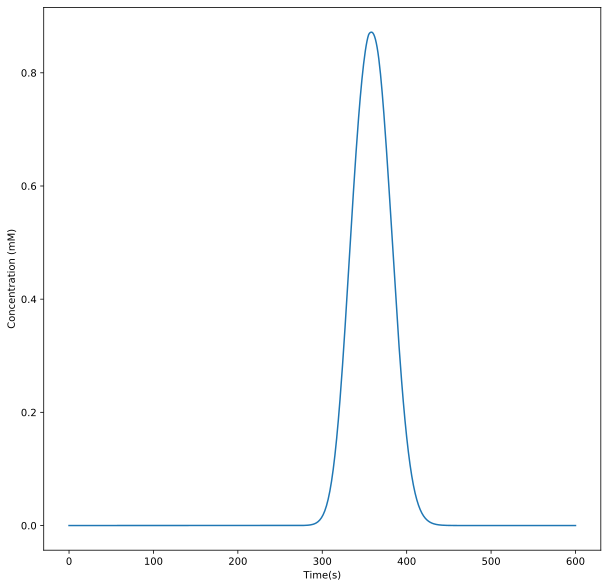

In [3]:
#simple model
example_dir_1 = lesson_1 / "example_1"
example_dir_1.mkdir(exist_ok = True)

example1 = Cadet(example0.root)

#give a filename for where the simulation should be saved
example1.filename = (example_dir_1 / 'example.h5').as_posix()

#set what values get saved
example1.root.input['return'].unit_000.write_solution_inlet = 1
example1.root.input['return'].unit_001.write_solution_bulk = 1
example1.root.input['return'].unit_002.write_solution_outlet = 1

example1.save()


#run the simulation
data = example1.run()

if data.returncode == 0:
    print("Simulation completed successfully")
    
    #load the data from the simulation so we can view the results
    example1.load()
    
    #plot the simulation
    plt.figure(figsize=[10,10])
    plt.plot(example1.root.output.solution.solution_times,
        example1.root.output.solution.unit_002.solution_outlet_comp_000)
    plt.xlabel('Time(s)')
    plt.ylabel('Concentration (mM)')
    
    #write the chromatogram data out to a csv file
    data = pandas.DataFrame([example1.root.output.solution.solution_times,
                        example1.root.output.solution.unit_002.solution_outlet_comp_000]).transpose()
    data.to_csv((example_dir_1 / 'example.csv').as_posix(), index=False, header=False)
    
else:
    print("Simulation failed")

## Looking inside the column

CADET can also save everything that happened inside the column during a simulation. Depending on what internal data you save this can be a lot of data so only save it if you need it. 

Once you have this data you can look at how your molecule moved through the column and even inside the beads.

In [4]:
ymax = numpy.max(example1.root.output.solution.unit_001.solution_bulk[:])

def graph_column(time=0):
    position = list(range(example1.root.input.model.unit_001.discretization.ncol))
    values = example1.root.output.solution.unit_001.solution_bulk[time, :, 0]
    plt.figure(figsize=[15,5])
    plt.plot(position, values)
    plt.ylim(0, ymax)
    plt.xlabel('Column Length')
    plt.ylabel('Concentration (mM)')

style = {'description_width': 'initial'}
interact(graph_column, time=widgets.IntSlider(min=0, max=len(example1.root.output.solution.solution_times) -1, step=10, layout={'width': '800px'}, style=style, description='Time'))

interactive(children=(IntSlider(value=0, description='Time', layout=Layout(width='800px'), max=600, step=10, s…

<function __main__.graph_column(time=0)>